In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import sklearn

In [3]:
df = pd.read_csv("G:\\DS150423\\MACHINE LEARNING\\framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.shape

(4238, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


In [8]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
X = df[df.columns.drop("TenYearCHD")]
Y = df["TenYearCHD"]

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [11]:
scaler = StandardScaler()

In [12]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [13]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [14]:
predictions = model.predict(X_test)
acc_score = accuracy_score(y_pred = predictions, y_true = Y_test)
acc_score

0.8661202185792349

In [15]:
matrix = confusion_matrix(y_pred = predictions, y_true = Y_test)
matrix 

array([[620,  10],
       [ 88,  14]], dtype=int64)

<AxesSubplot:>

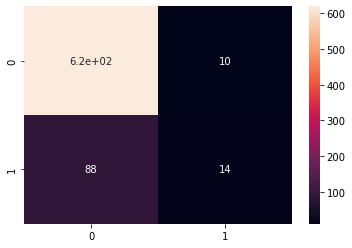

In [16]:
sns.heatmap(matrix, annot = True)

### CROSS VALIDATION

In [17]:
cross_val = cross_val_score(model, X, Y, cv=5)  # default = 5, cross-folds of dataset
cross_val

array([0.8579235 , 0.85088919, 0.8495212 , 0.84815321, 0.84815321])

In [18]:
mean_score = np.mean(cross_val)
mean_score

0.8509280647066297

In [19]:
cross_val1 = cross_val_score(model, X, Y, cv=10)  # default = 5, cross-folds of dataset
cross_val1

array([0.85519126, 0.85245902, 0.84699454, 0.84699454, 0.83606557,
       0.84153005, 0.84931507, 0.85479452, 0.85205479, 0.84931507])

In [20]:
mean_score1 = np.mean(cross_val1)
mean_score1

0.848471442473239

#### make model to extract features

In [24]:
pip install mlxtend

  Using cached mlxtend-0.23.0-py3-none-any.whl (1.4 MB)
  Using cached scikit_learn-1.3.1-cp39-cp39-win_amd64.whl (9.3 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\users\\dell\\anaconda3\\lib\\site-packages\\numpy-1.23.5.dist-info\\METADATA'



In [25]:
import mlxtend

ModuleNotFoundError: No module named 'mlxtend'

In [26]:
from mlxtend.feature_selection import SequentialFeatureSelector

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
'''forward => 1st select features thn fit the model'''

In [22]:
sklearn.metrics.get_scorer_names()

AttributeError: module 'sklearn.metrics' has no attribute 'get_scorer_names'

In [ ]:
feat_selector = SequentialFeatureSelector(model, k_features=10, forward = False, scoring = 'accuracy', cv=5)
feat_selector(X_train, Y_train)

In [ ]:
feat_selector.k_feature_idx_

In [36]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
feat_selector1 = SequentialFeatureSelector(model, k_features=5, forward = False, scoring = 'accuracy', cv=5)
feat_selector1(X_train, Y_train)

In [ ]:
feat_selector1.k_feature_idx_

In [ ]:
for i in ():
    print(df.columns[i])

In [ ]:
GridSearchCV => define a grid(table), parameter, value1, value2,... are columns

when parameters r imported, 

#### Define Grid Parameters - HyperParameter Tuning

In [33]:
param_grid = {'penalty' : ['none', 'l2', 'elasticnet'],
             'solver' : ['lbfgs', 'liblinear', 'sag', 'saga'],
             'C' : [1,2,3,4,5,6],
             'max_iter' : [50, 100, 150, 200, 300]}

In [34]:
gscv = GridSearchCV(model, param_grid=param_grid, cv = 5)

In [35]:
gscv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6],
                         'max_iter': [50, 100, 150, 200, 300],
                         'penalty': ['none', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']})

In [37]:
gscv.best_params_

{'C': 1, 'max_iter': 50, 'penalty': 'none', 'solver': 'lbfgs'}

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [45]:
model2 = LogisticRegression(C = 1, max_iter = 50, penalty = 'l2', solver = 'lbfgs')
model3 = LogisticRegression(C = 1, max_iter = 100, penalty = 'l2', solver = 'liblinear')
model4 = LogisticRegression(C = 1, max_iter = 200, penalty = 'l2', solver = 'newton-cg')

print(model2.fit(X_train, Y_train))
print(model3.fit(X_train, Y_train))
print(model4.fit(X_train, Y_train))

LogisticRegression(C=1, max_iter=50)
LogisticRegression(C=1, solver='liblinear')
LogisticRegression(C=1, max_iter=200, solver='newton-cg')


In [46]:
pred2 = model2.predict(X_test)
acc_score = accuracy_score(y_pred = pred2, y_true = Y_test)
acc_score

0.8360655737704918

In [47]:
pred3 = model3.predict(X_test)
acc_score = accuracy_score(y_pred = pred3, y_true = Y_test)
acc_score

0.8360655737704918

In [48]:
pred4 = model4.predict(X_test)
acc_score = accuracy_score(y_pred = pred4, y_true = Y_test)
acc_score

0.842896174863388

In [ ]:
'''when diff. models give same score, then check higher hyper-parameters flexibility & go ahead

In Decision Tree, the tree splits till the leaf_nodes become 1'''

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()